# Part 1 - Analyses univariées et bivariées

## Import des librairies

In [1]:
import pandas as pd
import numpy as np
import pickle

from descstats import Univa, Biva

## Import et lecture des données

In [2]:
df = pd.read_csv("data/billets.csv")

# Change columns order
columns = ['length', 'margin_up', 'margin_low', 'height_left', 'height_right', 'diagonal', 'is_genuine']
df = df[columns]
display(f"Length: {len(df)}")
display(df.head(10))

'Length: 170'

,length,margin_up,margin_low,height_left,height_right,diagonal,is_genuine
0,112.83,2.89,4.52,104.86,104.95,171.81,True
1,113.29,2.87,4.01,103.74,103.70,171.67,True
2,113.84,2.88,4.40,103.76,103.76,171.83,True
3,113.63,3.12,3.73,103.78,103.65,171.80,True
4,113.55,2.27,5.04,103.70,103.75,172.05,True
5,113.16,2.99,4.54,104.65,104.44,172.57,True
6,113.30,2.90,3.97,103.55,103.80,172.38,True
7,113.38,3.19,3.54,103.65,103.37,171.58,True
8,113.53,3.33,4.06,103.51,103.75,171.96,True
9,112.47,3.02,4.63,104.34,104.20,172.14,True


## Check des valeurs nulles et négatives

In [3]:
df = df.replace(0, np.nan)
display(df.isna().sum())
display(df[df<0].count())

length          0
margin_up       0
margin_low      0
height_left     0
height_right    0
diagonal        0
is_genuine      0
dtype: int64

length          0
margin_up       0
margin_low      0
height_left     0
height_right    0
diagonal        0
is_genuine      0
dtype: int64

RAS : Il n'y a ni NaN, ni zéro, ni valeurs négatives dans le dataset.

# Analyses univariées

---

## length

,length
Sample Size,170
Total,"19,137"
Min,109.97
Max,113.98
Mode,113
Mean,113
Median,113
Variance (σ²),0.85
Standard Deviation (σ),0.92
Coefficient of variation (CV),0.01


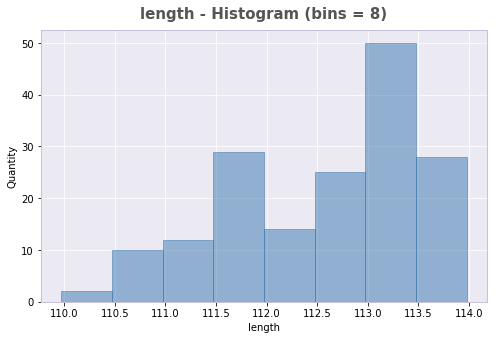

In [4]:
length_univa = Univa(df['length'])
length_univa.describe()
length_univa.distribution()

## margin_up

,margin_up
Sample Size,170
Total,539
Min,2.27
Max,3.68
Mode,3
Mean,3
Median,3
Variance (σ²),0.06
Standard Deviation (σ),0.24
Coefficient of variation (CV),0.07


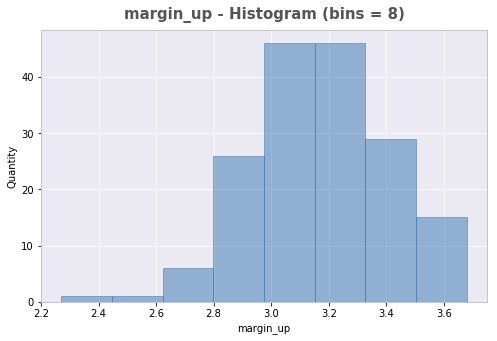

In [5]:
margin_up_univa = Univa(df['margin_up'])
margin_up_univa.describe()
margin_up_univa.distribution()

## margin_low

,margin_low
Sample Size,170
Total,784
Min,3.54
Max,6.28
Mode,4
Mean,5
Median,4
Variance (σ²),0.49
Standard Deviation (σ),0.70
Coefficient of variation (CV),0.15


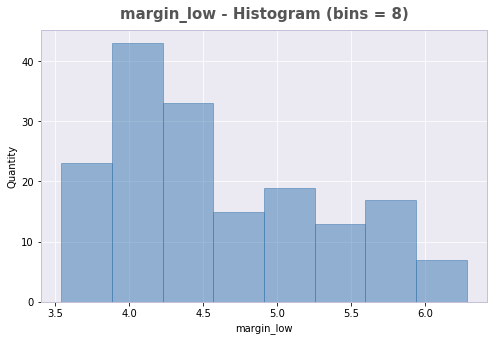

In [6]:
margin_low_univa = Univa(df['margin_low'])
margin_low_univa.describe()
margin_low_univa.distribution()

## height_left

,height_left
Sample Size,170
Total,"17,691"
Min,103.23
Max,104.86
Mode,104
Mean,104
Median,104
Variance (σ²),0.09
Standard Deviation (σ),0.30
Coefficient of variation (CV),0.00


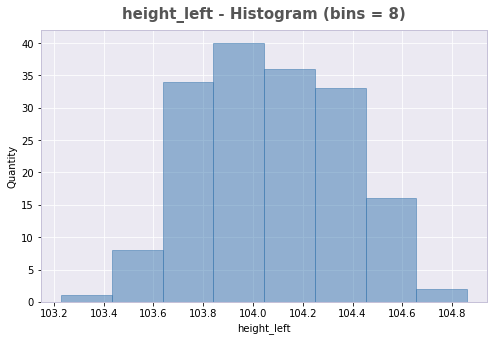

In [7]:
height_left = Univa(df['height_left'])
height_left.describe()
height_left.distribution()

## height_right

,height_right
Sample Size,170
Total,"17,668"
Min,103.14
Max,104.95
Mode,104
Mean,104
Median,104
Variance (σ²),0.11
Standard Deviation (σ),0.33
Coefficient of variation (CV),0.00


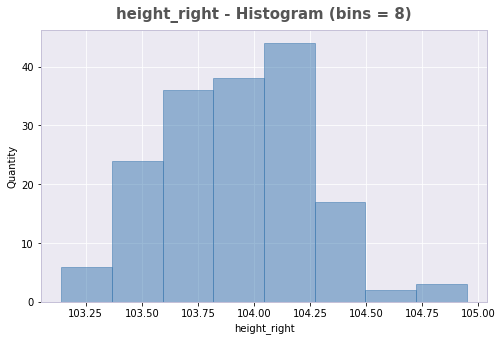

In [8]:
height_right = Univa(df['height_right'])
height_right.describe()
height_right.distribution()

## Diagonal

,diagonal
Sample Size,170
Total,"29,230"
Min,171.04
Max,173.01
Mode,172
Mean,172
Median,172
Variance (σ²),0.09
Standard Deviation (σ),0.31
Coefficient of variation (CV),0.00


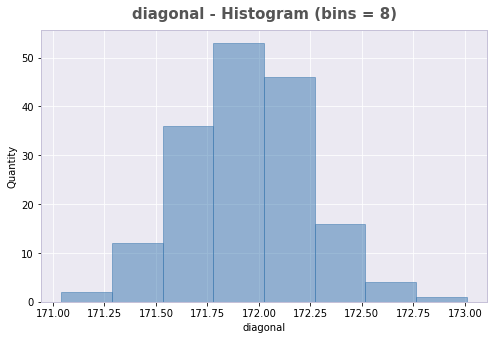

In [9]:
diagonal = Univa(df['diagonal'])
diagonal.describe()
diagonal.distribution()

## is_genuine

,is_genuine
Mode,True


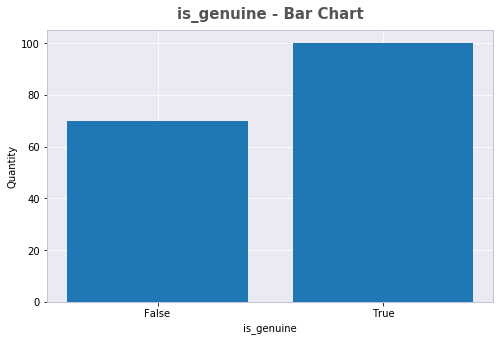

In [10]:
is_genuine = Univa(df['is_genuine'], quali=True)
is_genuine.describe()
is_genuine.distribution()

In [11]:
# Let's replace True / False by 1 / 0 to be explicit.
df.is_genuine = df.is_genuine * 1

## Matrice des coefficients de Pearson

In [12]:
df.drop('is_genuine', axis=1).corr()

,length,margin_up,margin_low,height_left,height_right,diagonal
length,1.000000,-0.525284,-0.637352,-0.421387,-0.417021,0.080295
margin_up,-0.525284,1.000000,0.171113,0.324788,0.366918,-0.027366
margin_low,-0.637352,0.171113,1.000000,0.424530,0.509375,-0.181020
height_left,-0.421387,0.324788,0.424530,1.000000,0.734390,0.319584
height_right,-0.417021,0.366918,0.509375,0.734390,1.000000,0.220418
diagonal,0.080295,-0.027366,-0.181020,0.319584,0.220418,1.000000


Parmi les plus corrélées, on retrouve :

- height_left / height_right : 0.73
- length / margin_low : -0.63
- length / margin_up : -0.53
- margin_low / height_right : 0.51

### height_left / height_right

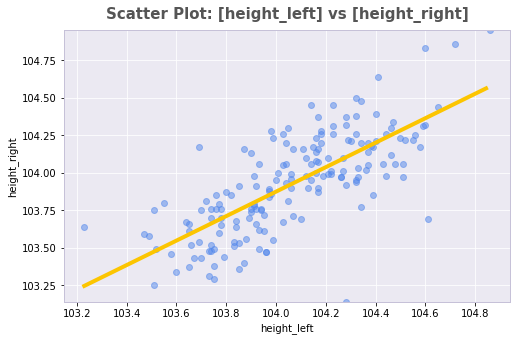

In [13]:
biva1 = Biva(df['height_left'], df['height_right'])
biva1.scatterplot()

### length / margin_low

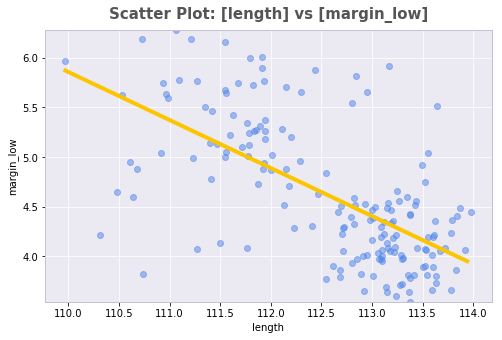

In [14]:
biva2 = Biva(df['length'], df['margin_low'])
biva2.scatterplot()

### length / margin_up

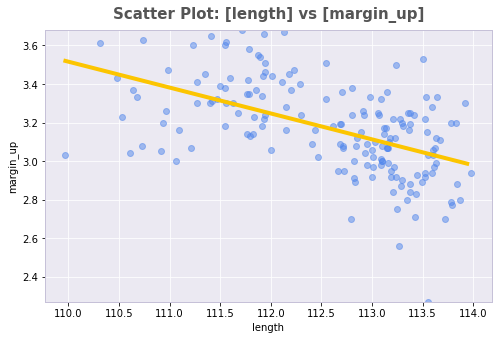

In [15]:
biva3 = Biva(df['length'], df['margin_up'])
biva3.scatterplot()

### margin_low / height_right

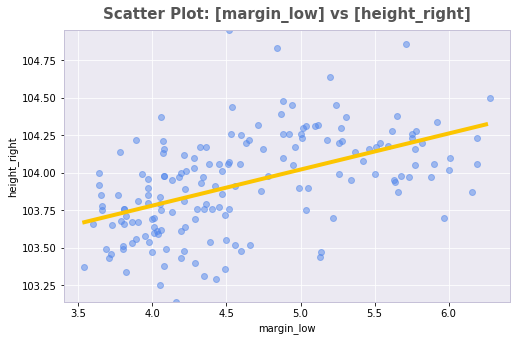

In [16]:
biva4 = Biva(df['margin_low'], df['height_right'])
biva4.scatterplot()

## Interprétations

Nous n'avons pas de données aberrantes. On voit que certaines variables sont corrélées. Il faudra faire attention à de potentielles colinéarités.

## Sauvegarde du jeu de données

In [17]:
with open('data/part1.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(df)